In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score

2024-03-25 05:00:28.397778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 05:00:28.397893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 05:00:28.579069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#read the data
df = pd.read_csv("/kaggle/input/network-model-14/networktrafficdata.csv", encoding='ISO-8859-1')
df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,Acknowledgment Number,Time to Live,Arrival Time,S7 Communication,Data length,Function,Length.1,Byte Address,Info,label
0,1,0.000000,192.168.0.2,192.168.0.1,COTP,145,0.000000,56667.0,102.0,1.0,1.0,128.0,"Jan 22, 2024 16:20:41.916356000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
1,2,0.000499,192.168.0.2,192.168.0.1,COTP,61,0.000499,56667.0,102.0,92.0,55.0,128.0,"Jan 22, 2024 16:20:41.916855000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
2,3,0.000710,192.168.0.2,192.168.0.1,COTP,61,0.000211,56667.0,102.0,99.0,317.0,128.0,"Jan 22, 2024 16:20:41.917066000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3,4,0.077318,192.168.0.2,192.168.0.1,COTP,61,0.000000,56665.0,102.0,1.0,1.0,128.0,"Jan 22, 2024 16:20:41.993674000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
4,5,0.316463,192.168.0.2,192.168.0.1,COTP,145,0.315753,56667.0,102.0,106.0,317.0,128.0,"Jan 22, 2024 16:20:42.232819000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,3921,187.656357,192.168.0.2,192.168.0.1,COTP,61,0.000457,56667.0,102.0,63330.0,191321.0,128.0,"Jan 22, 2024 16:23:49.572713000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3921,3922,187.656512,192.168.0.2,192.168.0.1,COTP,61,0.000155,56667.0,102.0,63337.0,191583.0,128.0,"Jan 22, 2024 16:23:49.572868000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3922,3923,187.658886,PcsCompu_53:3b:4f,LLDP_Multicast,LLDP,152,NaN,NaN,NaN,NaN,NaN,NaN,"Jan 22, 2024 16:23:49.575242000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/windows10 LA/port-001 20 SysN=WINDOWS10 Sys...,Abnormal
3923,3924,187.842001,192.168.0.13,192.168.0.1,TCP,60,32.809577,43430.0,102.0,1.0,1.0,64.0,"Jan 22, 2024 16:23:49.758357000 China Standard...",NaN,NaN,NaN,NaN,NaN,[TCP Dup ACK 373#5] 43430 > 102 [ACK] Seq=1 ...,Abnormal


In [3]:
# Assuming you have a DataFrame called df
missing_values = df.isna()  # or df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values per column
print(missing_count)

No.                                                0
Time                                               0
Source                                             0
Destination                                        0
Protocol                                           0
Length                                             0
Time since previous frame in this TCP stream     774
Source Port                                      774
Destination Port                                 774
Sequence Number                                  774
Acknowledgment Number                            774
Time to Live                                     207
Arrival Time                                       0
S7 Communication                                3771
Data length                                     3771
Function                                        3771
Length.1                                        3864
Byte Address                                    3772
Info                                          

In [4]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

In [5]:
df.rename(columns={'label': 'Label'}, inplace=True)

In [6]:
# Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
numeric_columns = ['Source', 'Destination','Protocol','Length',
       'Source Port',
       'Destination Port', 
       'Time to Live', 'Byte Address']

def preprocessing(df,numeric_columns):
    #copy of dataframe
    data = df.copy()
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    
        # Assuming you have a DataFrame named 'your_dataframe' with a column named 'old_column_name'
    # Rename 'old_column_name' to 'new_column_name'
    

    '''
      # Replace 0 values in 'Function' column with 'Unknown'
    data['Function'] = data['Function'].replace(0, 'Unknown')

    # Label encoding for specific string columns
    label_encoder = LabelEncoder()

    # Only encode string values while keeping 0s intact
    mask = data['Function'].apply(lambda x: isinstance(x, str))
    data.loc[mask, 'Function'] = label_encoder.fit_transform(data.loc[mask, 'Function'])
    data['Function'] = data['Function'].astype(int)
    '''
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    
   

    data['Source'] = data['Source'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    data['Destination'] = data['Destination'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    
    data['Byte Address'] = data['Byte Address'].apply(lambda x: 0 if x in [int('0')] else 1)
    
    
    # Assuming 'data' is your DataFrame and 'Protocol' column needs encoding
    data['Protocol'] = data['Protocol'].fillna('Unknown')  # Fill NaN values with 'Unknown'

    known_protocols = ['ARP', 'BROWSER', 'COTP', 'ICMPv6', 'IGMPv3', 'IPv4', 'LLDP', 'LLMNR',
                       'MDNS', 'NBNS', 'NTP', 'OpcUa', 'S7COMM', 'SSDP', 'TCP','TPKT','ICMP']

    # Create a label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'Protocol' column
    data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

    # Handling unknown protocols
    if 'Unknown' not in label_encoder.classes_:
        # Assign a unique value for 'Unknown' protocol
        unknown_label = max(data['Protocol']) + 1
        print(f"Assigning 'Unknown' protocol label as: {unknown_label}")
        data.loc[data['Protocol'] == 'Unknown', 'Protocol'] = unknown_label

    # Define a function to encode protocols or assign a default value for unknown ones
    def encode_protocol(protocol):
        if protocol in known_protocols:
            return label_encoder.transform([protocol])[0]
        else:
            return unknown_label  # Assign the value you previously determined for unknown protocols

    # Apply the encode_protocol function to the 'Protocol' column
    data['Protocol'] = data['Protocol'].apply(encode_protocol)
    
   
    # Fit and transform the 'Label' column
    data['Label'] = label_encoder.fit_transform(data['Label'])

    # Invert the labels
    data['Label'] = 1 - data['Label']
    y = data['Label']
    # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data= data[numeric_columns]
    dataframe = data.copy()
    # Convert the list to a NumPy array
    labels = np.array(y)
    #get values from dataset
    raw_data = data.values
        # Convert the data to numeric type
   
    # Get values not last column which is target column
    data = raw_data[:, 0:-1]
    #normalization of data
    data = ((data - data.min()) / (data.max() - data.min()))*2
    return dataframe,data,labels

In [7]:
#output of the function (dataframe)
dataframe,data,labels = preprocessing(df,numeric_columns)
dataframe

Assigning 'Unknown' protocol label as: 13


,Source,Destination,Protocol,Length,Source Port,Destination Port,Time to Live,Byte Address
0,0,0,13,145,56667.0,102.0,128.0,0
1,0,0,13,61,56667.0,102.0,128.0,0
2,0,0,13,61,56667.0,102.0,128.0,0
3,0,0,13,61,56665.0,102.0,128.0,0
4,0,0,13,145,56667.0,102.0,128.0,0
...,...,...,...,...,...,...,...,...
3920,0,0,13,61,56667.0,102.0,128.0,0
3921,0,0,13,61,56667.0,102.0,128.0,0
3922,1,1,13,152,0.0,0.0,0.0,0
3923,1,0,13,60,43430.0,102.0,64.0,0


Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6369 - loss: 0.5605 - val_accuracy: 0.8591 - val_loss: 0.4035
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8329 - loss: 0.4523 - val_accuracy: 0.8591 - val_loss: 0.3713
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.4029 - val_accuracy: 0.8591 - val_loss: 0.3313
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.3662 - val_accuracy: 0.8591 - val_loss: 0.3136
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.3428 - val_accuracy: 0.8879 - val_loss: 0.2918
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3328 - val_accuracy: 0.8913 - val_loss: 0.2763
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8786 - loss: 0.3163 - val_accuracy: 0.8930 - val_loss: 0.2613
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.2927 - val_accuracy: 0.8930 - val_loss:

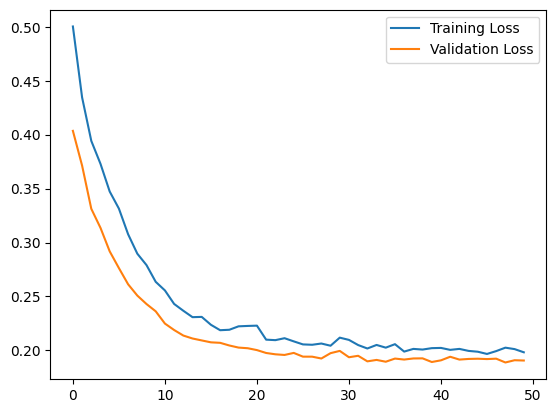

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9230 - loss: 0.2038 


In [8]:
def neural_networks(data, labels):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
   

    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    # Apply SMOTE for oversampling on training data
    #smote = SMOTE(random_state=42)
    #X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Replace num_features with the actual number of features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
    #plot training loss and validation loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    # Save the plot
    plt.savefig('loss_plot.png')  # Change the file extension and name as needed
    plt.show()
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model on the validation set
    nn_val_loss, nn_val_accuracy = model.evaluate(X_val, y_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    nn_predictions = y_pred_binary
    # Print evaluation metrics or use an existing function
    #print_stats(y_pred_binary, y_test)
    # Assuming your neural network model is defined in the neural_networks function
    # Train the neural network model and save it
   
    model.save("neural_network_model.h5")

    return nn_predictions,nn_val_loss, nn_val_accuracy,y_pred


# Example usage
nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle  # Import pickle for saving models

def machine_learning_data(data, labels, nn_predictions, nn_val_loss, nn_val_accuracy, y_pred):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Calculate and print the sizes of the datasets
    size_X = len(X)
    size_X_train = len(X_train)
    size_X_val = len(X_val)
    size_X_test = len(X_test)

    print(f"Size of the original dataset (X): {size_X}")
    print(f"Size of the training set (X_train): {size_X_train}")
    print(f"Size of the validation set (X_val): {size_X_val}")
    print(f"Size of the test set (X_test): {size_X_test}")
    
    # Initialize machine learning models with adjusted training data
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from xgboost import XGBClassifier

    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    lr_model = LogisticRegression(C=1.0, solver='lbfgs')
    xgboost_model = XGBClassifier(objective='binary:logistic')

    # Train machine learning models with resampled data
    rf_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    xgboost_model.fit(X_train, y_train)

    # Save each scikit-learn model using pickle
    with open('random_forest_model.pk', 'wb') as file:
        pickle.dump(rf_model, file)
    with open('svm_model.pk', 'wb') as file:
        pickle.dump(svm_model, file)
    with open('gradient_boosting_model.pk', 'wb') as file:
        pickle.dump(gb_model, file)
    with open('logistic_regression_model.pk', 'wb') as file:
        pickle.dump(lr_model, file)
    with open('xgboost_model.pk', 'wb') as file:
        pickle.dump(xgboost_model, file)

    # The rest of your code for predictions and evaluations...
    # Remember to include imports for metrics you're using like accuracy_score, precision_score, etc.
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

        # Predictions for machine learning models on test set
    rf_predictions = rf_model.predict(X_test)
    svm_predictions = svm_model.predict(X_test)
    gb_predictions = gb_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    xgboost_predictions = xgboost_model.predict(X_test)
    



    # Return values as needed or print them out directly
    return gb_predictions

# Make sure you have the necessary data and labels to call this function, along with the neural network predictions and other parameters.
gb_predictions = machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred)

Size of the original dataset (X): 3925
Size of the training set (X_train): 2747
Size of the validation set (X_val): 589
Size of the test set (X_test): 589
